# **EDA and Machine Learning prediction on Property Inspection**

## **1. Problem Statement**

**The main objective is to analse and predict the hazards in a property inspection dataset provided by the inspection held in 2009.** 
The column names are hidden and are given a random name to not breach the security of the properties.

## **2. Importing Packages**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')   
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
# For Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import operator
# For Machine Learning Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import to_graphviz, plot_importance

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [6]:
import nltk #natural language toolkit
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer #vectorization
from sklearn.feature_extraction.text import TfidfTransformer # to convert vectorize value into weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## **3. Loading Data**

In [7]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/PropertyInspection_train.csv')
data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,D,7,B,B,15,1,A,B,N,36,11,N,10,B,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,C,12,B,B,10,3,A,B,Y,78,10,Y,17,C,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,E,12,H,B,15,1,A,R,Y,71,21,Y,13,C,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,E,3,H,B,15,1,A,R,N,71,13,N,15,A,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,E,7,H,B,10,1,A,J,N,75,10,Y,11,B,1,22,1,2,7,N,N,E,1,1


## **4. Description of the Dataset**

This dataset contains different features which can be used to predict hazards to the property inspection.

## **5. Data Preprocessing**

In [5]:
# Checking null values
data.isnull().values.any()

False

In [6]:
print(data.Hazard.unique())

[ 1  4  5  7 15 14  8 16  6 11  3 13  2 18 10 17 22  9 21 20 12 19 37 23
 28 27 31 38 41 26 33 29 30 25 24 36 51 42 34 46 32 69 40 35 44 39 49 52
 63 64]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      50999 non-null  int64 
 1   Hazard  50999 non-null  int64 
 2   T1_V1   50999 non-null  int64 
 3   T1_V2   50999 non-null  int64 
 4   T1_V3   50999 non-null  int64 
 5   T1_V4   50999 non-null  object
 6   T1_V5   50999 non-null  object
 7   T1_V6   50999 non-null  object
 8   T1_V7   50999 non-null  object
 9   T1_V8   50999 non-null  object
 10  T1_V9   50999 non-null  object
 11  T1_V10  50999 non-null  int64 
 12  T1_V11  50999 non-null  object
 13  T1_V12  50999 non-null  object
 14  T1_V13  50999 non-null  int64 
 15  T1_V14  50999 non-null  int64 
 16  T1_V15  50999 non-null  object
 17  T1_V16  50999 non-null  object
 18  T1_V17  50999 non-null  object
 19  T2_V1   50999 non-null  int64 
 20  T2_V2   50999 non-null  int64 
 21  T2_V3   50999 non-null  object
 22  T2_V4   50999 non-null

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,50999.0,50929.727897,29314.685894,1.0,25660.5,50977.0,76268.5,101999.0
Hazard,50999.0,4.022785,4.021194,1.0,1.0,3.0,5.0,69.0
T1_V1,50999.0,9.722093,5.167943,1.0,6.0,9.0,14.0,19.0
T1_V2,50999.0,12.847585,6.255743,1.0,7.0,14.0,18.0,24.0
T1_V3,50999.0,3.186004,1.739369,1.0,2.0,3.0,4.0,9.0
T1_V10,50999.0,7.020451,3.595279,2.0,3.0,8.0,8.0,12.0
T1_V13,50999.0,13.996255,4.647499,5.0,10.0,15.0,20.0,20.0
T1_V14,50999.0,1.578521,0.862882,0.0,1.0,1.0,2.0,4.0
T2_V1,50999.0,57.580051,23.499818,1.0,40.0,56.0,77.0,100.0
T2_V2,50999.0,12.419616,4.783411,1.0,9.0,11.0,15.0,39.0


In [11]:
categorical = []
numerical = []
for i in data.columns:
    if data[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print('Categorical Variables:\n',categorical)
print('\nNumerical Variables:\n',numerical)

Categorical Variables:
 ['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11', 'T2_V12', 'T2_V13']

Numerical Variables:
 ['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


In [22]:
numerical_features=['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']
categorical_features=['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11', 'T2_V12', 'T2_V13']

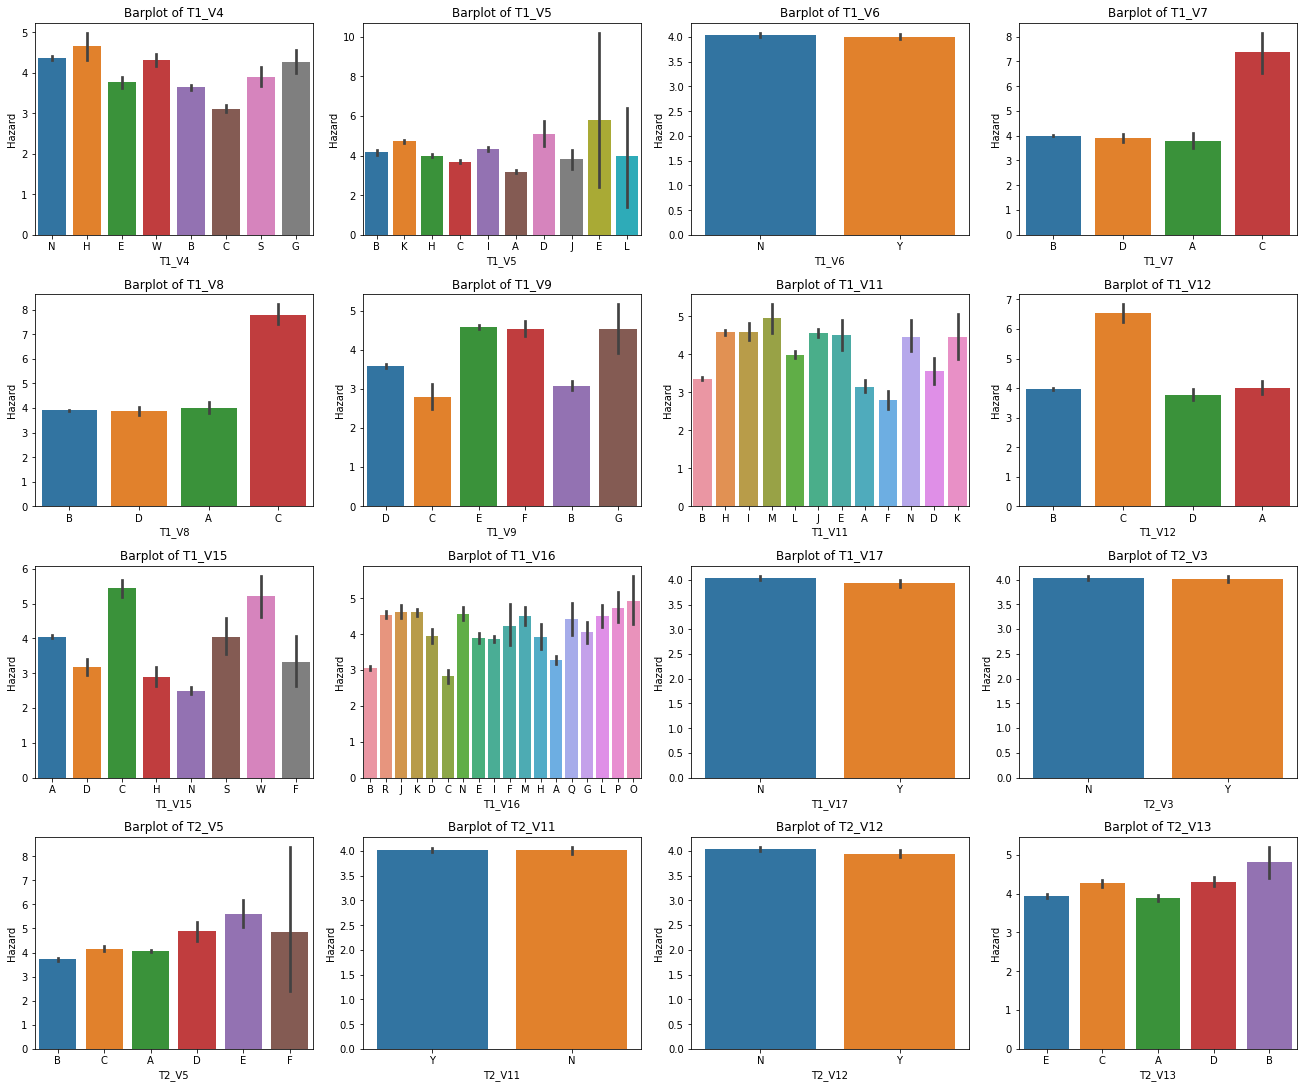

In [23]:
figs, axes = plt.subplots(4,4, figsize=(18,15), constrained_layout=True)
ax = axes.flat
for col,ax in zip(categorical_features, ax):
    sns.barplot(data[col], data.Hazard, ax=ax, orient='v')
    ax.set_title(f"Barplot of {col}")
plt.show()

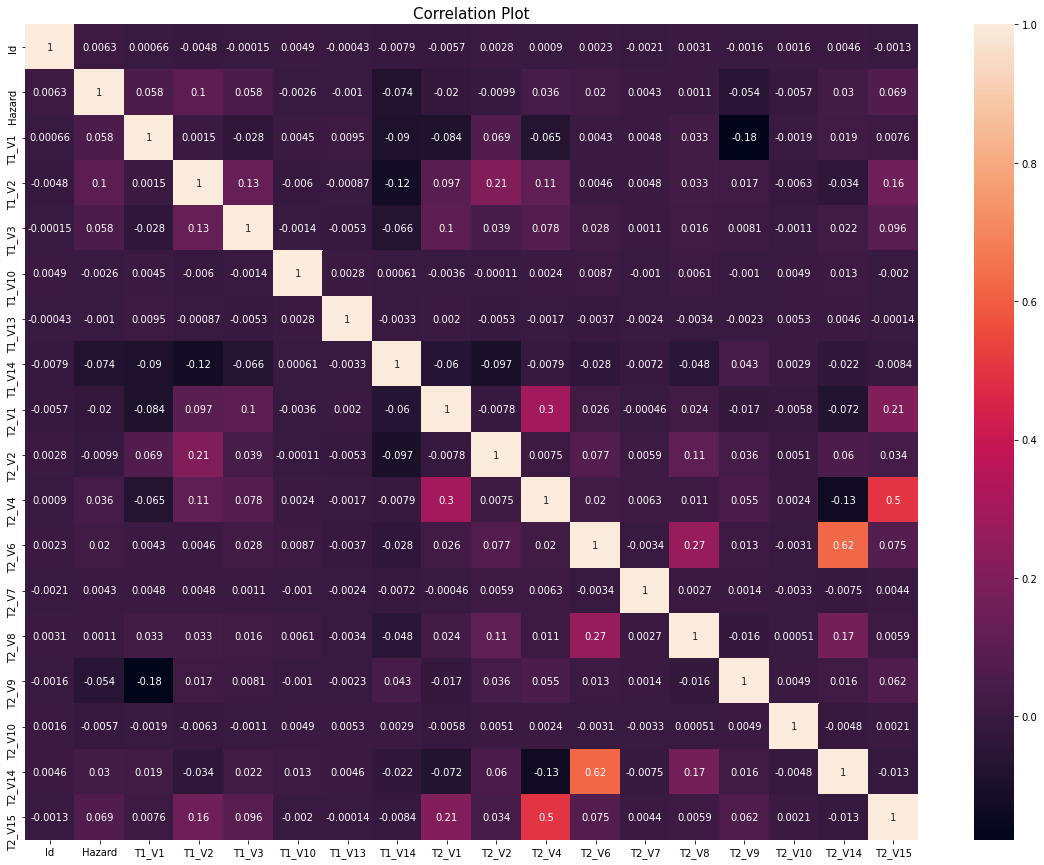

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Plot',fontdict={'fontsize':15})
plt.show()

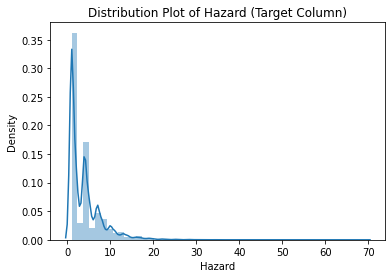

In [24]:
sns.distplot(data.Hazard)
plt.title('Distribution Plot of Hazard (Target Column)')
plt.show()

## **6. Feature Selection**

In [37]:
data1=data.loc[:, data.columns != 'Hazard']
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
#  Converting categorical values to numbers by grouping the mean values of Hazard score
def get_data():
    features = list(data1.columns)
    y = data.Hazard

    for feat in data.select_dtypes(include=['object']).columns:
        m = data.groupby([feat])['Hazard'].mean()
        data[feat].replace(m,inplace=True)

    x = data[features]
    return features, x, y
features, x, y = get_data()
ceate_feature_map(features)

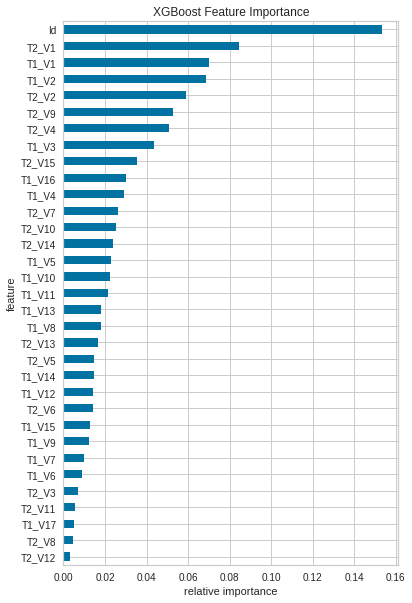

In [38]:
# Xgboost feature importance
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(x, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [39]:
data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,5,1,0,1,1,2,7,1,1,15,1,0,1,0,36,11,0,10,1,2,37,1,11,6,1,0,4,2,2
1,2,4,16,14,5,4,1,0,1,1,1,12,1,1,10,3,0,1,1,78,10,1,17,2,2,22,1,18,5,1,1,4,2,1
2,3,1,10,10,5,5,8,0,1,1,3,12,5,1,15,1,0,17,1,71,21,1,13,2,6,37,2,14,6,1,1,4,6,1
3,4,1,18,18,5,5,8,0,1,1,3,3,5,1,15,1,0,17,0,71,13,0,15,0,2,25,1,1,6,1,0,2,2,6
4,5,1,13,19,5,5,5,0,1,1,3,7,5,1,10,1,0,9,0,75,10,1,11,1,1,22,1,2,7,0,0,4,1,1


In [40]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced'))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

Total Features Selected are 14
Features: ['Id', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V16', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V7', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


## **8. Model Development & Evaluation**

In [41]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=42)

### **8.1 Logisitic Regression**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_linreg_pred= linreg.predict(X_test)
r2_linreg= r2_score(y_test, y_linreg_pred)
print('Linear Regression R squared:',r2_linreg)
print(mean_squared_error(y_test, y_linreg_pred))

Linear Regression R squared: 0.05097179389954376
15.801054288613278


### **8.2 Lasso Regression**

In [36]:

# Lasso regression model
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.006188497,  copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X_train, y_train)
y_lasso_pred= lasso.predict(X_test)
r2_lasso= r2_score(y_test, y_lasso_pred)
print('Lasso R squared:',r2_lasso)
print('Mean Squared error:',mean_squared_error(y_test, y_lasso_pred))
# 0.006188497

Lasso R squared: 0.050925213702679106
Mean Squared error: 15.801829835867514


### **8.3 Random Forest**

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_fscore_support
forest = RandomForestRegressor(n_estimators = 500, n_jobs=-1, max_depth=400, oob_score=False, max_features=11)
forest.fit(X_train, y_train)
y_rf_pred= forest.predict(X_test)
r2_rf= r2_score(y_test, y_rf_pred)
print('Randon_forest R squared:', r2_rf)
print('Mean Squared error:',mean_squared_error(y_test, y_rf_pred))

Randon_forest R squared: 0.09004525632671934
Mean Squared error: 15.15049206392157


In [44]:

d = {'Pred_values': y_rf_pred[0:10], 'Actual_values': y_test[0:10]}
df = pd.DataFrame(data=d)
df

,Pred_values,Actual_values
4207,4.784,1
6583,5.414,6
21013,4.254,5
12773,3.726,4
22264,3.132,1
3918,3.914,1
37967,2.034,1
34514,4.532,4
32435,5.230,4
44815,4.114,1
